In [1]:
#Importing All The Necessary Packages
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
from sklearn.decomposition import PCA
import  matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 

In [143]:
xls_file=pd.ExcelFile('C:\Users\Amardeep\Desktop\DATA1.xlsx')

In [144]:
F1=xls_file.parse('Sheet7')

In [145]:
F1

,Incubation period h,Initial pH,Incubation temperature °C,Molasses conc wt.%,Experimental Yield,Predicted Yield
0,72,5,40,25,88.86,90.14
1,48,6,40,20,243.32,224.85
2,48,6,30,20,178.89,177.44
3,72,6,30,20,192.03,183.22
4,24,7,20,25,220.45,207.73
5,48,6,30,25,110.22,108.58
6,48,6,20,20,200.00,218.18
7,72,5,40,15,230.93,232.68
8,48,6,30,20,177.00,177.44
9,72,5,20,15,74.39,81.02


In [148]:
F1.set_index('Experimental Yield', inplace=True)
F1['Experimental Yield'] = F1.index

In [149]:
F1S = StandardScaler().fit_transform(F1)

In [150]:
pca = PCA(n_components=3, svd_solver='full')

In [151]:
PC_scores = pca.fit_transform(F1S)

In [152]:
scores_pd = pd.DataFrame(data = PC_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = F1.index)

In [153]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = F1.columns)

In [154]:
loadings_pd

,PC1,PC2,PC3
Incubation period h\t,0.089485,0.260040,-0.000000e+00
Initial pH,-0.007408,0.547090,-8.160680e-01
Incubation temperature °C,0.049453,-0.671074,-3.988899e-01
Molasses conc wt.%\t,-0.032711,-0.427460,-4.182343e-01
Predicted Yield,0.702983,-0.002173,7.654865e-14
Experimental Yield,0.703019,0.002154,-7.416214e-14


In [155]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

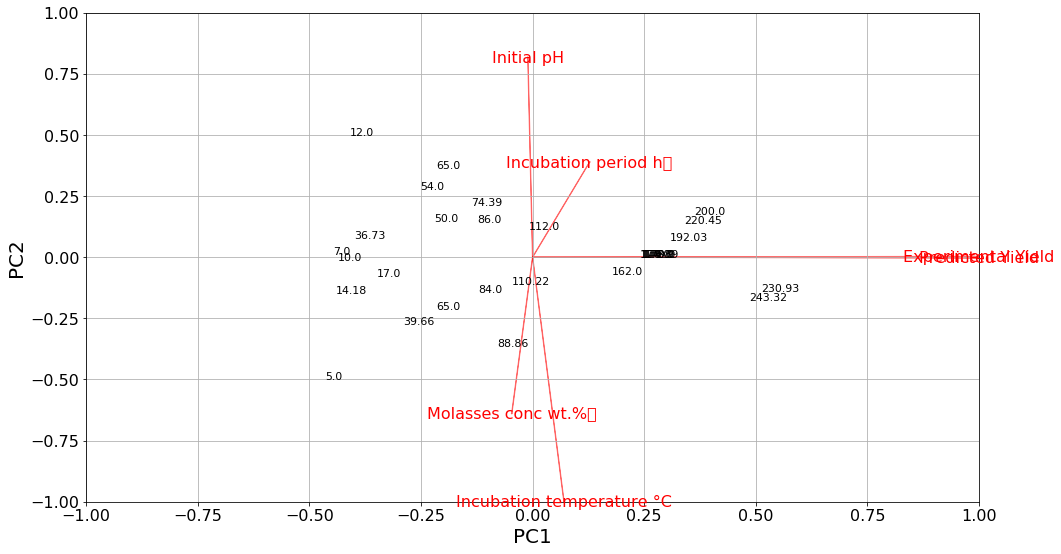

In [156]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(PC_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()